# Unsupervised Learning - KMeans Clustering

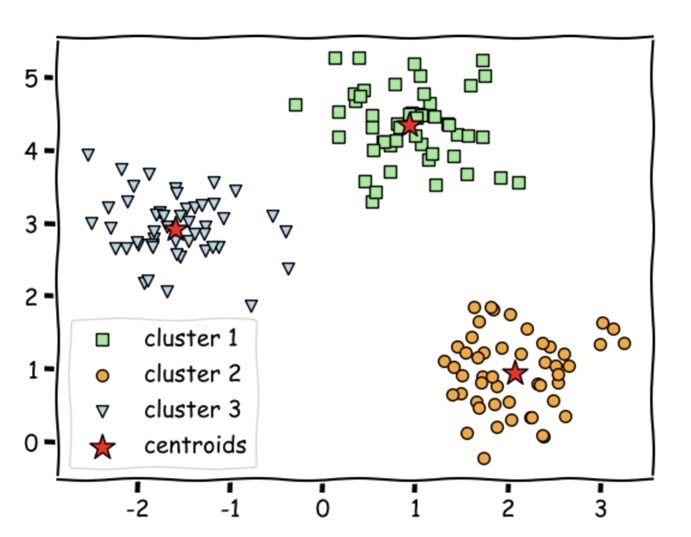

So far, all of the machine learning algorihms that you have seen are supervised learning. That is, the datasets have all been labeled, classified, or categorized.

Dataset that have been labeled are known as *labeled data*, while datasets that have not been labeled are known as *unlabaled data*.

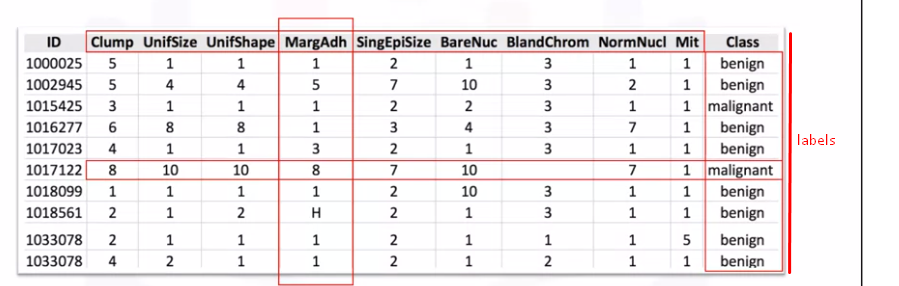

The following image shows an example of labeled data. It shows characteristics of a tumor. Based on the clump, shape, size, and other features, we can determine if the tumor is benign or malignant. The type of tumor is known as the *label*.

*Unlabaled data*, on the other hand, is data without labels.

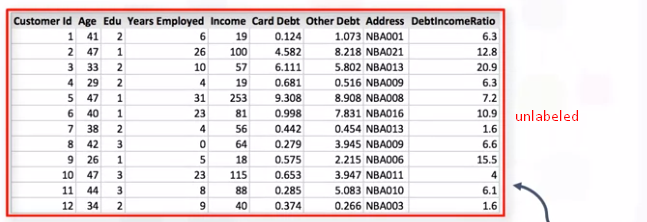

The following shows the dataset shows the attributes of a group of customers with their financial status. We don't know the relationship between any of this information.

We can try to organize them into groups based on Income or debt-to-income Ratio, and from there figure out the average debt-to-income ratio. This would probably be useful in determining who to give loans to.

Since there are no labels, it's important that we find a pattern in the unlabeled data. This technique of finding patterns in unlabeled data is known as *clustering*. The point of clustering is to segregate groups with similiar traits and assign them into groups (clusters).

A common algorithm used for clustering is the **K-Means Clustering** algorthm.

## How Clustering in K-Means Works?

Let's walk through a simple example so that you can see how clustering using K-Means works. Suppose you have a series of unlabeled data points, as shown in the following image.

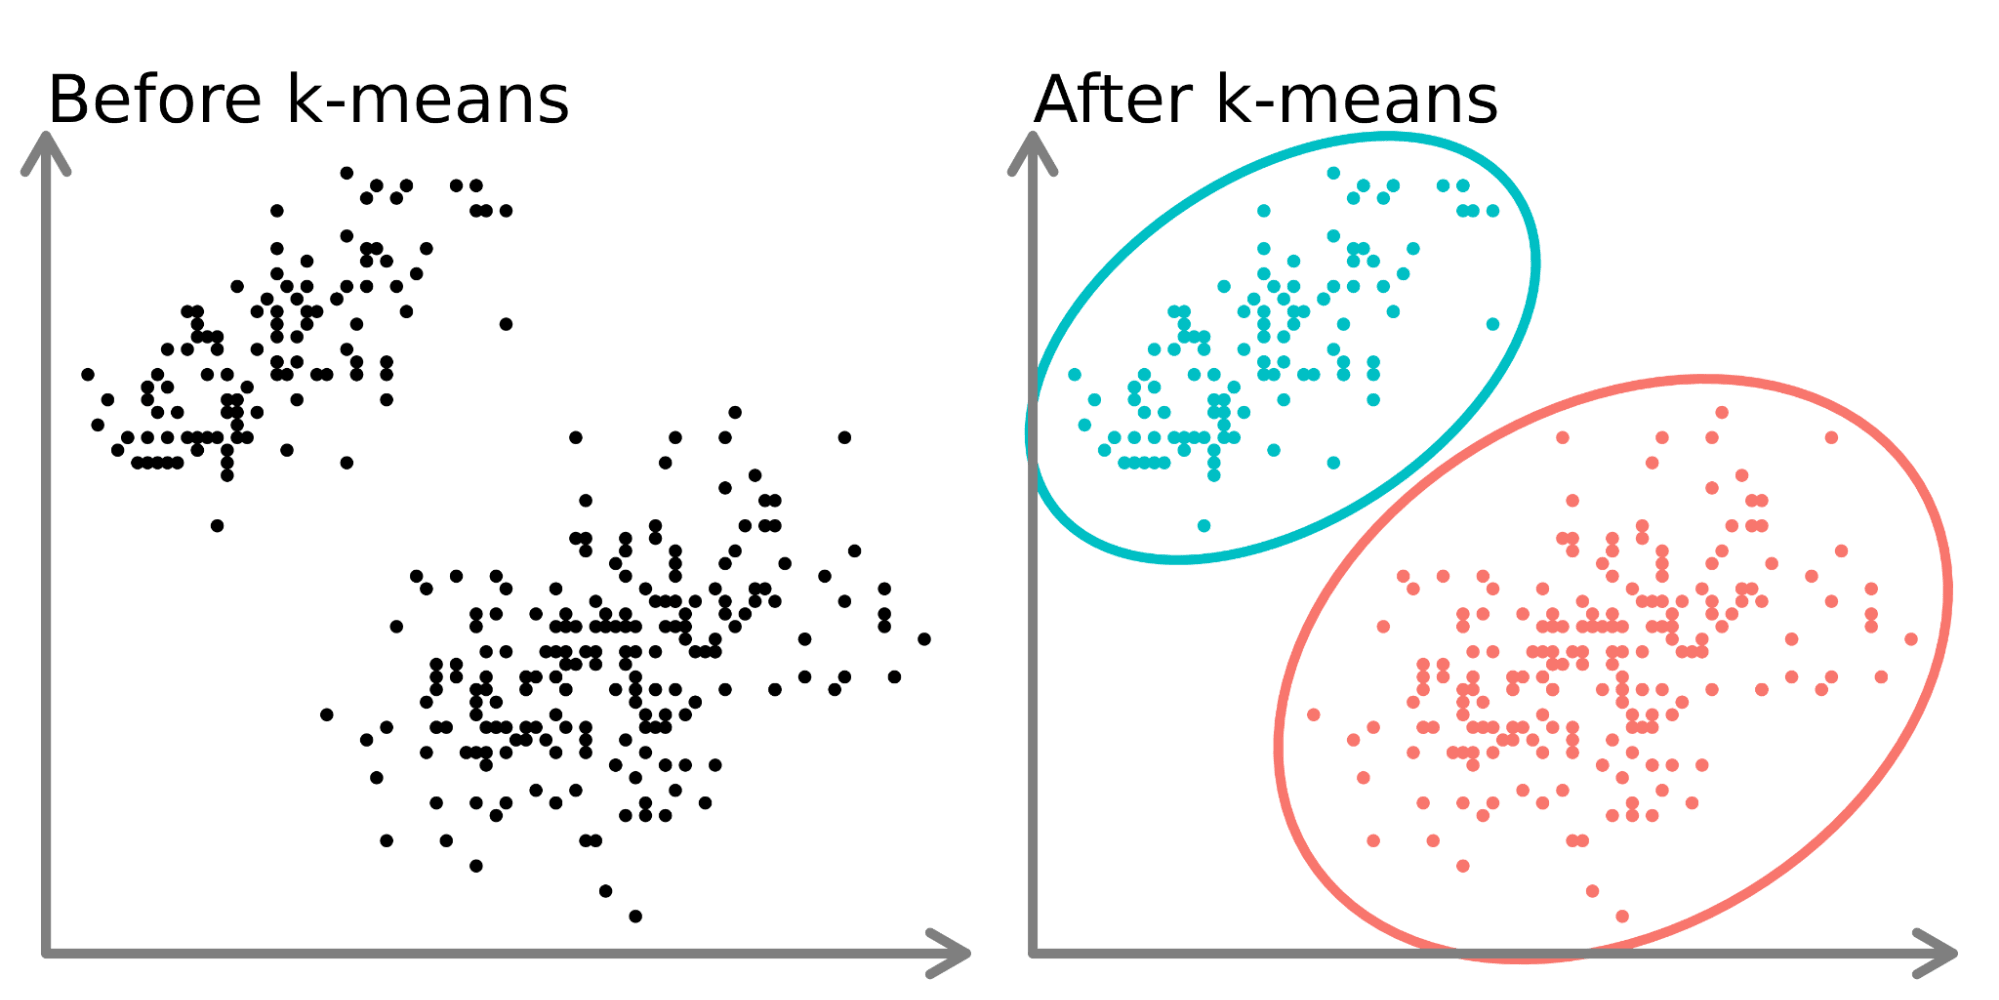

Your job is to cluster all of these points into distinct groups so that you can discover a pattern among them. Suppose that you want to seperate them into two groups (K=2). The end result would look like the chart on the right.

How does it accomplish this? First, the algorithm will randomly put K (2 in our case) number of centroids. For each point on the graph, we measure the distance between itself and each of the centroids.

As we can see, any of the datapoints that are closer to the green centroid are classified as green. Likewise, any of the datapoints that are closer to the red centriod is classifed as red. After the first round, the points would be clustered, as shown in the GIF.

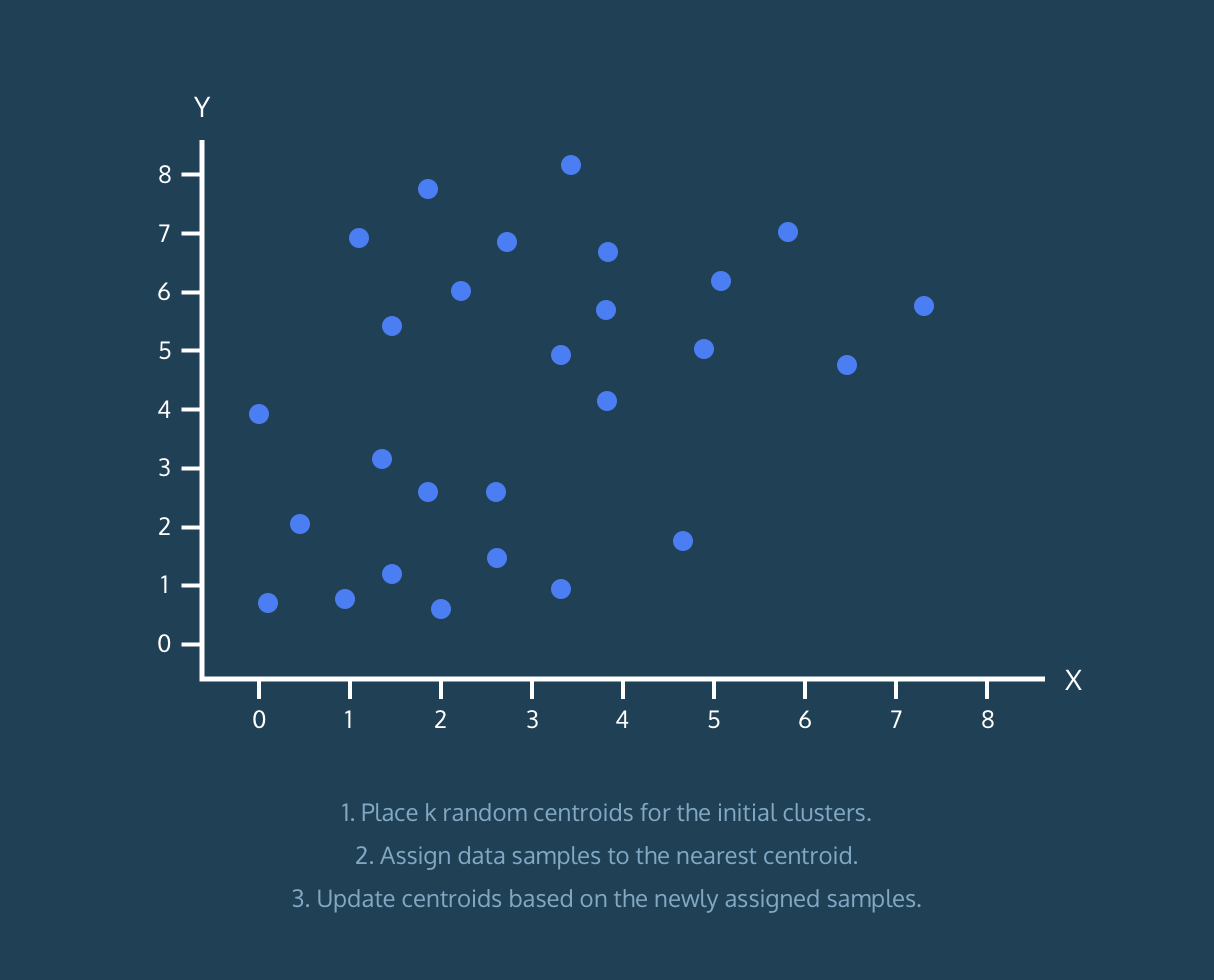

Now take the average of all the points in each cluster and reposition the centroids using a newly calculated average. As the GIF shows, the centroid moves to a new position.

With the new centroid's position, you measure the distance between each of the old centroid and the new centroid. If the distance is 0, that means that the centroid did not change position. We keep repeating the entire process until l all the centroids do not change positions anymore.

### Applying K-Means Clustering using Centroids

Now that you have a clear picture of how K-Means clustering works, we can implement this using Python. 

First we're going to implement the algorithm using standard python libraries `numpy`, `pandas`, and `matplotlib`. We're also going to borrow from the `iris` dataset from the `sklearn` library.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline


iris = datasets.load_iris()

The `sklearn` library comes with many datasets that can be used for practicing data science and machine learning concepts. The `iris` library is one of the best libraries for supervised learning. However, we're practicing *unsupervised learning*, and the `iris` library comes with labeled data, which is not what we want.

We're going to create a new DataFrame which uses two features: sepal length (cm), and sepal width (cm). The sepal length will be the x variable and the sepal width will be the y variable. We will also start off by assigning them to a class.

In [2]:
df = pd.DataFrame({
    'x': iris.data[:, 0],
    'y': iris.data[:, 1],
    'cluster': iris.target
})

df.head()

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Now we're going to find the centroids. We need to create a black dictionary called `centroids`. Then create a loop that calculates the average of the x variable and the y variable. We then append the result to the dictionary.

In [4]:
centroids = {}

for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] ==  i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i ]['y'].mean())

    centroids[i] = result_list


centroids

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

Now we have the average, we can plot the centroids.

Text(0, 0.5, 'Sepal Width')

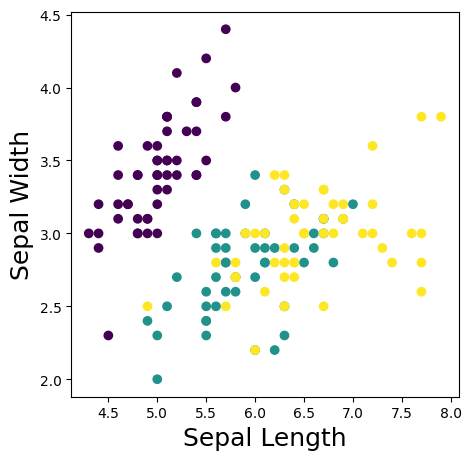

In [5]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(df['x'], df['y'], c = iris.target)
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)


As we can see, we have three different classes (K=3), so we will create three different clusters. We're going to plot the centroid so you will have an idea of where the algorithm will measure the distance from.

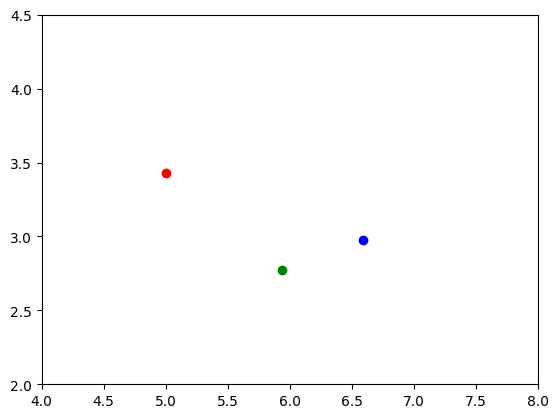

In [6]:
colmap = {0: 'r', 1:'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])

plt.xlim(4, 8)
plt.ylim(2, 4.5)
plt.show()
    

Now we can plot everything together in relation to the other clusters.

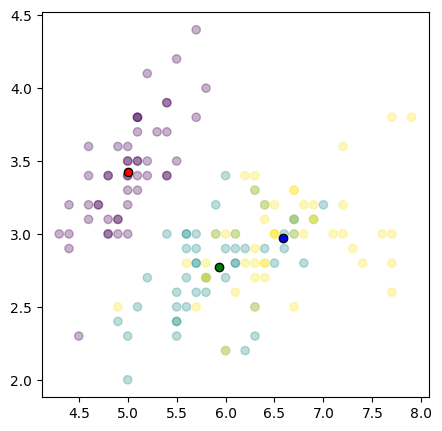

In [7]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c=iris.target, alpha= 0.3) 
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

Now we're going create a function that takes each individual centroid and calculate the distance between each centroid and each cluster. Which ever distance is the smallest, the function will assign a color based on that distance.

In [8]:
def assignment(df, centroids):
    for i in range(3):
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])

    return df


df = assignment(df, centroids)
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


As we can see from the DataFrame, all of the clusters that are closer to 0 will be assigned with `r`, which is shortcode for the color red. Clusters closer to 1 will be assigned with `g`, shortcode for the color green, and clusters closer to 2 will be assigned with `b`, shortcode for blue.

From there, we can plot the clusters. The points that are solid and bright are the centroids and the points that are slighly more transparent are clusters that *potentially* belong to that color.

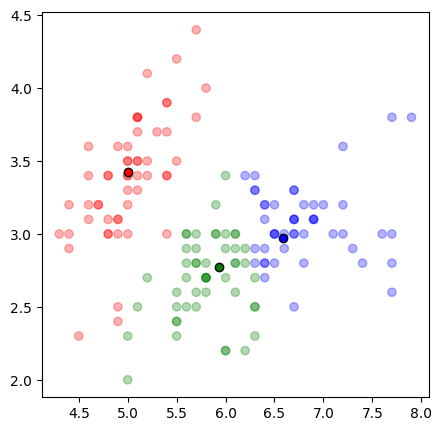

In [9]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color= df['color'], alpha = 0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i], edgecolor='k')

plt.show()


What we will do now is create a loop that calculates the new centroid by looking running the same function from before. This loop will keep running until the centroid doesn't change, then we will our final cluster

In [10]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centriods = centroids
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break


Now we can plot our final result.

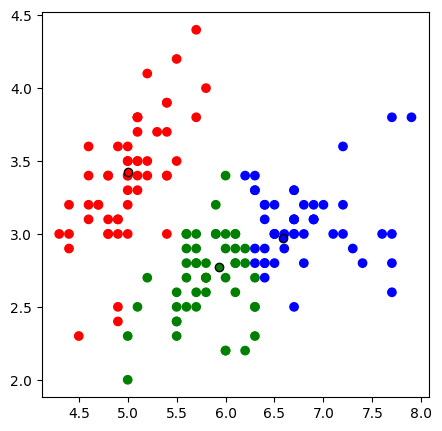

In [11]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'])

for i in centroids.keys():
    plt.scatter(centriods[i][0], centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()

## K-Means Clusting Using Scikit-Learn

In [12]:
college_df = pd.read_csv('unsupervised learning_activity_dataset.csv', index_col=0)
college_df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
# Shape of the dataset
college_df.shape

(777, 18)

In [ ]:
# List of the column names
college_df.columns

In [ ]:
# List of all numerical columns
college_df.select_dtypes(include='number').columns

In [ ]:
# List of all non-numerical column
college_df.select_dtypes(exclude='number').columns

In [ ]:
# Data types of each in a DataFrame
college_df.dtypes

### Exploratory Data Analysis

In [ ]:
# Find out how many entries (rows and columns) there are, what 
# type of objects are in the DataFrame (to observe if they have the correct type) etc.
college_df.info()

In [ ]:
# Summarize the data to see the distribution of data (Statistical information of numerical column)
college_df.describe()

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continuous (numeric) feature
sns.histplot(college_df['Outstate'].dropna(), kde=False, bins=30)
plt.show()


In [ ]:
# Compute the arithmetic mean (average) value
college_df['Outstate'].mean()

In [ ]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continuous (numeric) feature
sns.histplot(college_df['Grad.Rate'].dropna(), kde=False, bins=30)
plt.show()

In [ ]:
# Compute the arithmetic mean (average) value
college_df['Grad.Rate'].mean()

In [ ]:
# Display data correlation (correlation between all numerical feature variables)
college_df.drop(columns='Private').corr()

In [ ]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) and explore correlation between all continous (numeric) feature variable through visualizations
ax = sns.heatmap(data=college_df.drop(columns='Private').corr(), annot=True, cmap='coolwarm')
plt.ylim(17,0)
plt.show()

In [ ]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Enroll', y='Grad.Rate', 
           data=college_df, 
           hue='Private', 
           palette='Set1', 
           markers=['x', 'o'], 
           height=8, 
           aspect=1,
           fit_reg=False)

In [ ]:
# Display (plot), and explore the relationship between a pair of numerical features as a function of third feature
sns.lmplot(x='Expend', y='Grad.Rate',
           data=college_df, 
           hue='Private', 
           palette='Set1', 
           markers=["x", "o"], 
           height=8, 
           aspect=1, 
           fit_reg=False)

In [ ]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Room.Board', y='Grad.Rate', 
           data=college_df, 
           hue='Private', 
           palette='Set1', 
           markers=["x", "o"], 
           height=8, 
           aspect=1, 
           fit_reg=False)


In [ ]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Personal', y='Grad.Rate', 
           data=college_df, 
           hue='Private', 
           palette='Set1', 
           markers=["x", "o"], 
           height=8, 
           aspect=1, 
           fit_reg=False)


In [ ]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Outstate', y='F.Undergrad', 
           data=college_df, 
           hue='Private', 
           palette='Set1', 
           markers=["x", "o"], 
           height=8, 
           aspect=1, 
           fit_reg=False)


In [ ]:
# Set up of the graph size
plt.figure(figsize=(12,8))

# Displays (plot) and explor the stacked histogram of a continous (numeric) feature based on categorical feature
college_df[college_df['Private'] == 'Yes']['Outstate'].hist(alpha=0.5, color = 'blue', bins=20, label='Private=Yes')
college_df[college_df['Private'] == 'No']['Outstate'].hist(alpha=0.5, color ='red', bins = 20, label = 'Private=No')

# Show a lengedn on the axes
plt.legend()

# Set the label for the x-axis
plt.xlabel('Outstate')

In [ ]:
# Initalize a Grid of Facets and display (plot) different subset of data on top of each other (stacked)
g = sns.FacetGrid(college_df, hue="Private", palette='coolwarm', height=6, aspect=2)

# Draw a univariate plot on the Facet (histogram) and explore the distribution
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

In [ ]:
# Set up of graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) and explore the Stacked histogram of a continous (numeric) feature based on categorical feature
college_df[college_df['Private'] == 'Yes']['Grad.Rate'].hist(alpha=0.5, color='blue', bins=20, label='Private=Yes')
college_df[college_df['Private'] == 'No']['Grad.Rate'].hist(alpha=0.5, color='red', bins=20, label='Private=No')

# Show a legend on the axes
plt.legend()

# Set the label for the x-axis
plt.xlabel('Grad.Rate')


In [ ]:
# Initalize a Grid of Facets and display (plot) different subsets of data on top of each other (stacked)
g = sns.FacetGrid(college_df, hue='Private', palette='coolwarm', height=6, aspect=2)

# Draw a univariate plot on Facet (Histogram) and explore the distribution
g = g.map(plt.hist, 'Grad.Rate', bins = 20, alpha=0.7)

### Dealing With Non-Numerical Features

In [ ]:
# List all non-numerical columns
college_df.select_dtypes(exclude='number').columns

In [ ]:
# Create a new column indicating the categorical data (0 or 1)
cluster = pd.get_dummies(college_df['Private'], drop_first=True, dtype=int)

# Concatination of dummy columns to actual DataFrame
college_df = pd.concat([college_df, cluster], axis=1)

# Drop column (feature) from the table
college_df.drop('Private', axis=1, inplace=True)

# Rename column names
college_df.rename(columns = {'Yes': 'Cluster'}, inplace=True)

# Display the few top rows of a DataFrame
college_df.head()

### Preparing the Clusters for Plotting

In [ ]:
# Convert a datatype of a column to 'int'
college_df['Cluster'] = college_df['Cluster'].astype(int)

# Split of DataFrame to columns
college_df_new = college_df.drop('Cluster', axis=1)
cluster_df = college_df[college_df.columns[-1:]]

# Display the few top rows of DataFrame
college_df_new.head()

In [ ]:
# Display the few top rows of a DataFrame
cluster_df.head()

In [ ]:
# Instantiate the StandardScaler() model with parameters
# Create an instance of class StandardScaler() model (Standard Scaler object)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the features
scaler.fit(college_df_new)

# Transform the features to a scaled version and create scaled features variable
scaled_features = scaler.transform(college_df_new)

# Check the scaled values
scaled_features

In [ ]:
# Convert the scaled features to a DataFrame
college_df_feat = pd.DataFrame(scaled_features, columns=college_df.columns[:-1])

# Concatination of two DataFrame with reseting index of the DataFrame to concatenate
college_df_feat = pd.concat([college_df_feat.reset_index(drop=True), 
                             cluster_df.reset_index(drop=True)], 
                             axis=1)

# Display the few top rows of a DataFrame
college_df_feat.head()

### Creating the K-Means Clustering Model

In [ ]:
# Import the 'KMeans' model from family 'cluster' of Scikit-Learn
from sklearn.cluster import KMeans

# Instantiate the KMeans() model (Estimator) with parameters
# Create an instance of class KMeans() model (KMeans object)
# n_clusters - the number of clusters we expect or want to explore (K=2)
kmeans = KMeans(n_clusters=2)

# Fit the K-Means Clustering model on data in dataset
kmeans.fit(college_df_feat)

# Centers of the clusters
km_centers = kmeans.cluster_centers_

# Labels of the clusters
km_labels = kmeans.labels_

### Evaluating The Model - Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(college_df['Cluster'], kmeans.labels_))

### Evaluation The Model - Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_km = confusion_matrix(college_df['Cluster'], kmeans.labels_)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_km,
                              display_labels = [0, 1])

disp.plot()
plt.show()

In [ ]:
college_df

### Plotting of Cluster Data

In [ ]:
# Set up of the graphic areas size
fig, ax = plt.subplots(figsize=(12,8))

# Plot the clustered data
plt.scatter(scaled_features[km_labels==0,0], scaled_features[km_labels==0,1], c='green', label='Public')
plt.scatter(scaled_features[km_labels==1,0], scaled_features[km_labels==1,1], c='blue', label='Private')

# Plot the centroids
plt.scatter(km_centers[:,0], km_centers[:,1], marker='*', s=300, c='r', label='centroid')

# Configure the ranges of the axes
plt.xlim([-1,5])
plt.ylim([-1,5])

# Title of the plot
plt.title('Clusters of Universities', fontweight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Set up of the graphic areas size
fig, ax = plt.subplots(figsize=(12,8))

# Plot the clustered data
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=km_labels, cmap='coolwarm')
plt.scatter(km_centers[:,0], km_centers[:,1], marker='*', s=300, c='yellow', alpha=0.5)

# Configure the ranges of the axes
plt.xlim([-1,5])
plt.ylim([-1,5])

# Title of the plot
plt.title('Clusters of Universities', fontweight='bold')

# Show the plot
plt.show()